**Business Problem**

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

In [ ]:
from google.colab import files

In [ ]:
x = files.upload()

Saving netflix.csv to netflix.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('netflix.csv')
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


First, let's start with exploring data.

In [ ]:
df.shape

(8807, 12)

So the data has 8807 rows and 12 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Mostly all the columns are of string type, only release year is of numeric type

Now we should move on to check data quality check.

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


So, we got to know that director column has 2634 null values, cast has 825 null values, country has 831 null values, date_added has 10 null values, rating has 4 null values and duration has 3.

Now director, cast and country has a lot of null values, between 10% to 40% missing values, so we have to fill those values. And for the rest of clomuns which are having null values, for duration we can do the median of values and for others we can drop them as they will ot affect the whole result.

In [ ]:
df['director'].fillna('Unknown', inplace = True)

/tmp/ipython-input-2764026650.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace = True)


In [ ]:
df['cast'].fillna('is_missing', inplace = True)

/tmp/ipython-input-3266751084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna('is_missing', inplace = True)


In [ ]:
df['country'].fillna('No_data', inplace = True)

/tmp/ipython-input-759595447.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('No_data', inplace = True)


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df.dropna(subset = ['date_added'], inplace = True)

In [ ]:
df.dropna(subset = ['rating'], inplace = True)

In [ ]:
df.dropna(subset = ['duration'], inplace = True)

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


So, we have filled and dropped values wherever those were required.

In [ ]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Now, as we know we have only one numerical column here, which is release year and in this column we are looking at its statistical aspects.

In [ ]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,is_missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No_data,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,is_missing,No_data,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


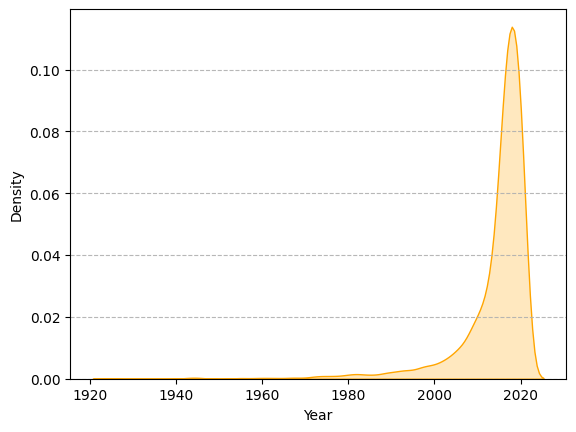

In [ ]:
sns.kdeplot(data = df, x = 'release_year', color = 'Orange', fill = True)
plt.xlabel('Year')
plt.ylabel('Density')
plt.grid(axis="y", linestyle="--", alpha=0.9)

By looking at this KDE plot we are understanding the density of movies or number of movies or TV release year is increasing from 2000 to 2020.

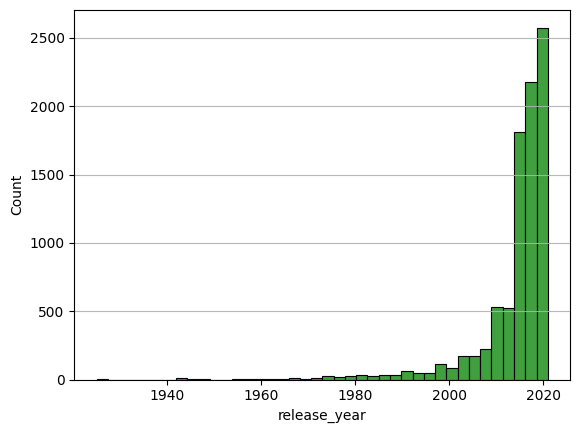

In [ ]:
sns.histplot(data = df, x = 'release_year', color = 'green', bins = 40)
plt.grid(axis = 'y', alpha = 0.9)

Here is another representation using the histplot, here we have binned them into 100 bins so that we can get another view of the distribution of release year of movies or tv shows.

In [ ]:
df['listed_in'].value_counts()

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
...,...
"Dramas, Horror Movies, Sci-Fi & Fantasy",1
"British TV Shows, TV Dramas, TV Sci-Fi & Fantasy",1
"Comedies, Cult Movies, Sports Movies",1


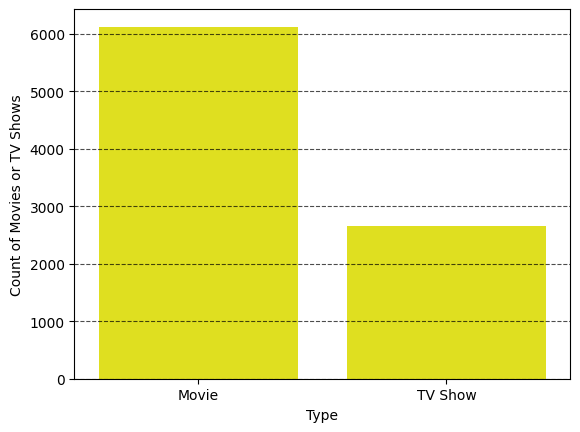

In [ ]:
sns.countplot(data = df, x= 'type', color = 'yellow')
plt.xlabel('Type')
plt.ylabel('Count of Movies or TV Shows')
plt.grid(axis="y", linestyle="--", alpha=0.7, color= 'black')

From the above graph we can clearly see that the count of movies is way more than the tv shows. TV shows are 2800 approx and movies are around 6100 approx. This is showing Movies are way more than TV shows, so we got to know netflix is focusing more on movies.

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,is_missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No_data,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,is_missing,No_data,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Now let's do some bivariate visual analysis.

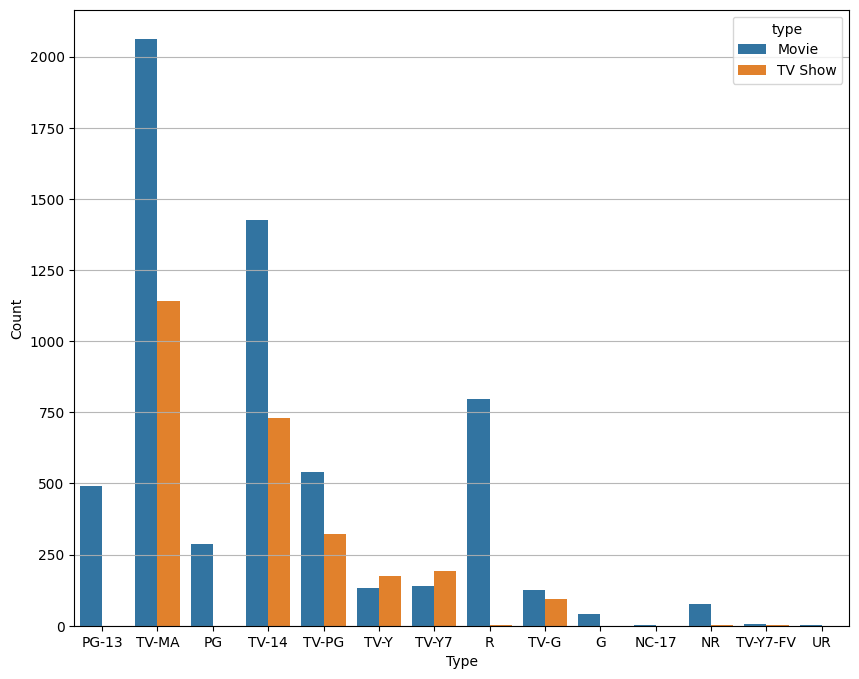

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data = df, x= 'rating', hue = 'type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.grid(axis = 'y', alpha = 0.9)

As we can see from the graph movies has more rating then TV shows in most of the cases. Maximum rating are for Movies for mature audience (TV-MA). so netflix should produce or release more shows for mature audience.

Second highest is TV 14, as this category also has potenial so netflix should focus more on relasing this category shows.

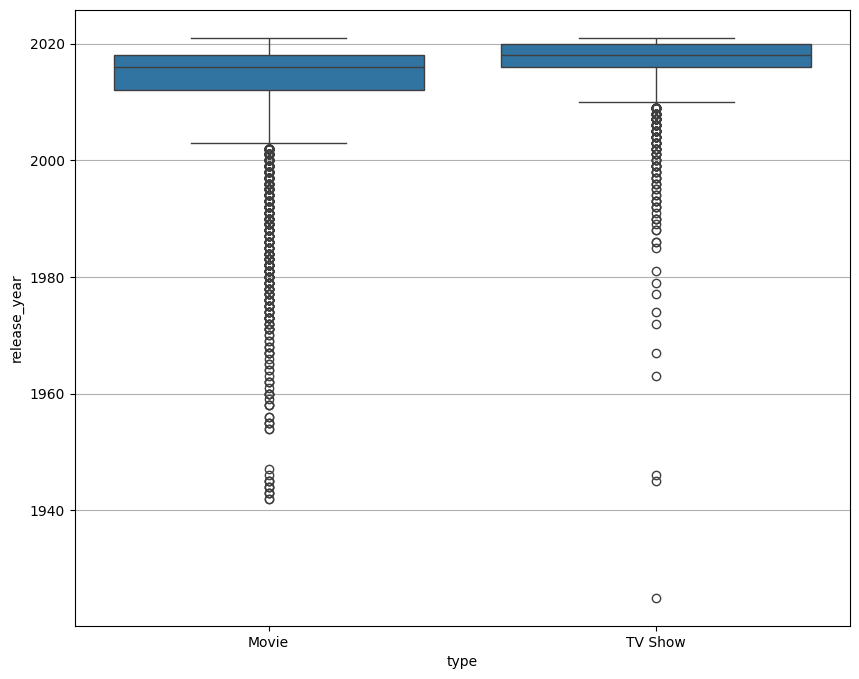

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data = df, x= 'type', y = 'release_year')
plt.grid(axis = 'y' )

From the graph we can see, the median for TV shows is more recent than the Movies, suggesting Netflix is being focusing more on TV shows than movies.

The box is more concentrated between 2010-2020, suggesting that the movies and tv shows all are recent only, in which tv shows are bit more recent on platform. The platform has some old classics also which we can see with outliers.